MultiClass Classification Project Report
==============================================================

## 1. Multi-Class Classification Overview

In machine learning, multi-class or multinomial classification refers to the problem classifying instances in one or more classes. In such a problem, each record belongs to exactly one category, and the goal of the algorithms is to construct a classifier that, given a new data point, correctly identifies in which class the new data point falls. We use the following notations throughout the report.

Given the data set $D = \{({x}_i,\, y_i)_{i = 1}^{n=140}  \}$ consisting $n$ observations, the input ${x}_i \in \mathbb{R}^p$ is a vector of $p = 908$ features for one subject, and the output/response, $y_i \in \{1, 2, \cdots, K\}$, belongs to one out of $K = 3$ categories, and each input/subject belongs to exactly one class. 

### 1.1 Approaches for Multi-Class Classification
There are two key ideas to solve such multi-class problems. The first idea is to reduce the multi-class into binary, where we start with decomposing the multi-class response into multiple binary decisions, and then make final decisions based on multiple binary classifiers. The second idea is to train a single classifier instead of reducing into multiple classifiers. This approach is similar to the common machine learning approaches, where we minimize the empirical risk by considering all classes simultaneously.

#### 1.1.1 Reducing Multi-Class into Binary

* **One-vs-Rest Strategy**

    In this case, we assume each class is individually separable from all the others. The multi-class problem is decomposed into $K$ binary classification tasks, and train $K$ models. Specifically, for each class $k \in \{1,2,\cdots, K\}$, we construct a binary classification model such as 
    * Positive Events: the subject belongs to class $k$;
    * Negative Events: the subject belongs to any class other than $k$.

    For each task, we could use any binary classification algorithms, like logistic regression, decision tree, etc., and build single models. When doing inference, we use the "Winner-Takes-All" rule, that is, the subject is classified into the category that has maximum probability when assessed in each model.

* **One-vs-One Strategy**

    It could also be called \textit{All-vs-All}. As its name suggests, we need to compare each pair of two categories, assuming every pair is separable. So the multi-class problem is decomposed into ${K \choose 2}$ binary classification tasks, and train ${K \choose 2} = K(K-1)/2$ models. Specifically, for each pair of classes, $(i,\, j)$, we construct a binary classification model such as
    * Positive Events: the subject belongs to class $i$;
    * Negative Events: the subject belongs to class $j$.

    Similarly, for each task, we could use logistic regression, decision tree, etc., and learn each model


#### 1.1.2 Inherently Multi-Class Classifier

Except for the two approaches above, some models inherently support multi-class classification. Popular choices include multi-class SVM, multinomial logistic regression, KNN, Decision Tree-based methods, LDA, ect. 

#### 1.1.3 Error-Correcting Output Code-based strategies

Each class is represented by a binary code (an array of 0 and 1). The matrix which keeps track of the location/code of each class is called code book. Intuitively, each class should be represented by a code as unique as possible and a good code book should be designed to optimize classification accuracy. At fitting time, one binary classifier per bit in the code book is fitted. At prediction time, the classifiers are used to project new points in the class space and the class closest to the points is chosen. And the error-correcting output codes have a similar effect to bagging.

#### 1.1.4 Ensemble

When we have multiple machine learning models that are skillful on the multi-class classification problem, but in different ways, we could further use the ensemble aggregation technique to learn how to best combine the predictions from two or more base machine learning algorithms to make a prediction as good as or better than any single base models that we have investigated. Most ensemble methods use a single base learning algorithm to produce homogeneous base learners, i.e. learner of the same type, leading to homogeneous ensembles. There are also some methods that use heterogeneous ensembles. In order for ensemble methods to be more accurate than any of its individual members, the base learner have to be as accurate as possible and as diverse as possible.

* **Boosting**
    If we choose base models with low variance but high bias, it should be with an aggregating method called boosting that tends to reduce bias. Examples of boosting algorithms include AdaBoost, Gradient Tree Boosting, xgboost and lightgbm.
     

* **Bagging**
    If we choose base models with low bias but high variance, it should be with an aggregating method called bagging that tends to reduce variance. Examples of bagging include Random Forest, extra trees, ect.
    
    
* **Stacking**
    We could also use Stacked Generalization, or so-called super-learner. The architecture of a stacking model involves two or more base models. The stack, or the meta-model, is trained on the predictions made by base models on out-of-sample data. In classification problems, we could use a logistic regression model, or a random forest, or even a neural network as our meta-model. The meta-model takes in predictions from base models as input, and predicts the labels for the training set. To make a prediction on a new sample, firstly, the row of the data is provided as input to each base model to generate a prediction from each base model. The predictions from the base models are concatenated into a vector and provided as input to the meta-model. The meta-model then makes a final prediction for the row of data. Note that, the inputs to the meta-learner could be class labels or class probabilities, with the latter more likely to be useful given the uncertainty captured in the predictions.
    
    Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. The final estimator is trained through cross- validation.




### 1.2 Evaluation Metric

There are many quantitative metrics({Precision, Recall, F1, Confusion Matrix, AUC score}) which could evaluate the model and see which classes the model is confusing with one another. We use *classification accuracy* as our metric.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier, ElasticNet, ElasticNetCV, Perceptron, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier,OutputCodeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, RandomTreesEmbedding, IsolationForest
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_hist_gradient_boosting
from scipy import stats
from sklearn import preprocessing
from sklearn import naive_bayes
from sklearn import model_selection

#!conda install -c anaconda seaborn -y
import seaborn as sns
import time
#import resource 
#import sys
#!{sys.executable} -m pip install xgboost
#!{sys.executable} -m pip install lightgbm
import xgboost
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

my_rands = 2021512

## 2. Data Exploration

We are provided with train and test data set. For each set, there are 903 features, with 3 categorical features. The following procecure finishes the task of Data Exploration, where we could answer the following questions:

* **Is there any missing data?**

    No there are no missing data, and we do not need to apply any imputations techqniues to handle such situation.
 
 
* **Are the covariate features correlated?**

    We will see that $X_{114}$ and $X_{521}$ are highly correlated. If we change the threshold, we will identify more correlated pairs. As there are colinearity, for prediction purpose, we should consider about machine learning methods that are robust to such situation, e.g. tree-based method, SVM. We might consider Lasso/Ridge regularization or Elastic Nets for illustration purposes.
    

* **How do the features distributed? Do we need to preprocess the data(feature scaling)?**

    From the plot of density curves for a randomly selected subset of features, we could see multiple bell-shaped curves, but there are some differences in scales and ranges of the numerical featuress from the descriptive summary table. Some machine learning techniques(eg. tree-based methods) are very robust and invariant to feature scaling, while others are not. For example, the methods based on Gradient Descent optimization will be influenced with respect to the step size in gradient descent; the distance-based methods could be awfully incluenced because they use distances to determine the similarity between data points, which is strongly affected by the magnitude of the features. For better prediction purpose, we preprocessing the feature scaling over the continuous features. 
    
    Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, we obtain the same scale for all columns, except for the first three columns, where the features are categorical type.

    And there are also three categorical features, we will do a one-hot encoding to preprocess these variables.


* **Train-Validation**
    To assess candidate methodologies, we split our original train data into a new train data set and a validation data set.

False
False
False
114  521    0.707406
521  114    0.707406
dtype: float64
              3           4           5           6           7           8    \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    -3.706226    0.620541   -0.691226   -2.883438    0.798445    0.276561   
std      4.064704    3.014747    3.295262    3.331956    3.484214    3.203680   
min    -12.753200   -8.020900   -9.688800  -10.540100   -8.493400   -6.525400   
25%     -6.393700   -1.665500   -2.625975   -5.215000   -1.934025   -1.833875   
50%     -4.022400    0.559550   -0.651150   -3.022050    1.005600    0.309250   
75%     -0.860025    2.784550    1.432475   -0.441100    3.353100    2.432525   
max      7.862500    9.077900    7.729800    5.230100   10.856000    8.125200   

              9           10          11          12   ...         893  \
count  140.000000  140.000000  140.000000  140.000000  ...  140.000000   
mean     0.382528   -0.890959   -1.694734   -0.

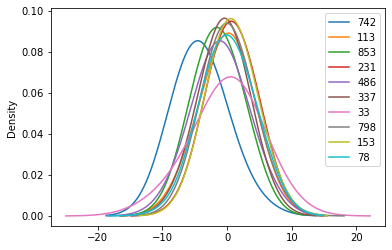

In [2]:
# Load Data
X = pd.read_csv('train_features.csv', header=None)
y = pd.read_csv('train_labels.csv', header = None)
X_test = pd.read_csv('test_features.csv', header = None)

# Is there any missing values?
print(X.isnull().values.any())
print(X_test.isnull().values.any())
print(y.isnull().values.any())

# Are the features correlated? 
corr = X.corr()
# print(corr) 
# The corr matrix is too big, we list highest correlation pairs from the large correlation catrix instead
c = X.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending = False)
thresh = 0.7
print(so[(so != 1.0) & (so > thresh)])

# How do the features distributed? Do we need feature scaling?
# there are too many features, we only show a randomly selected subset of features to see their desity curves
df = X.sample(axis='columns',n=10, random_state = my_rands)
ax = df.plot.kde(bw_method=1)
#ax.get_legend().remove()
print(X.describe())

# one-hot encoding 
X = pd.get_dummies(X, columns = [0,1,2])
X_test = pd.get_dummies(X_test, columns = [0,1,2])

# scaling: 
#  the goal is to use the scaler to handle all data and put them back to X and X_test
scaler = preprocessing.StandardScaler()
my_X = scaler.fit_transform(X.iloc[:, 0:900])
my_X = pd.DataFrame(my_X)
df_c = pd.concat([my_X, X.iloc[:, 900:]], axis=1)
df_c.columns = X.columns

my_X_test = scaler.fit_transform(X_test.iloc[:, 0:900])
my_X_test = pd.DataFrame(my_X_test)
df_t = pd.concat([my_X_test, X_test.iloc[:, 900:]], axis=1)
df_t.columns = X_test.columns

X = df_c
X_test = df_t

# X_train, X_valid, y_train, y_valid for training and validation purposes
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=my_rands)

## 3. Building Machine Learning Models

We assessed a variety of machine learning methods, and consider different ways to ensemble the learners into super learners. We will train different models over the train set and make predictions over the validation set, so that we could choose among different candidates. All of the models have been fitted with tuned parameters.

In [3]:
# Logistic Regression(cross validated) 
time0 = time.clock()
logreg_cv = LogisticRegressionCV(multi_class = 'multinomial', cv=10,random_state = my_rands)
logreg_cv.fit(X_train, y_train.values.ravel())
y_pred_cv = logreg_cv.predict(X_valid)
print(confusion_matrix(y_valid, y_pred_cv))
print(classification_report(y_valid, y_pred_cv))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_cv = model_selection.cross_val_score(logreg_cv, X_train, y_train.values.ravel(), cv = kfold)
print(results_cv.mean())
print(accuracy_score(y_valid, y_pred_cv))
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))

[[ 0  4  2]
 [ 0 20  1]
 [ 1  6  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      0.95      0.78        21
           2       0.73      0.53      0.62        15

    accuracy                           0.67        42
   macro avg       0.46      0.50      0.47        42
weighted avg       0.59      0.67      0.61        42

0.697777777777778
0.6666666666666666
 60.7 secs


In [4]:
##### ovr better than multiclass? No
time0 = time.clock()
logreg_cv = LogisticRegressionCV(#multi_class = 'multinomial', 
                                 cv=10, multi_class = 'ovr',
                                 random_state = my_rands)
logreg_cv.fit(X_train, y_train.values.ravel())
y_pred_cv = logreg_cv.predict(X_valid)
print(confusion_matrix(y_valid, y_pred_cv))
print(classification_report(y_valid, y_pred_cv))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_cv_ovr = model_selection.cross_val_score(logreg_cv, X_train, y_train.values.ravel(), cv = kfold)
print(results_cv_ovr.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, y_pred_cv)

[[ 1  4  1]
 [ 1 20  0]
 [ 4  6  5]]
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.67      0.95      0.78        21
           2       0.83      0.33      0.48        15

    accuracy                           0.62        42
   macro avg       0.56      0.48      0.48        42
weighted avg       0.65      0.62      0.59        42

0.6874074074074075
 81.1 secs


0.6190476190476191

In [5]:
# Ridge 
time0 = time.clock()
model_ridge = RidgeClassifierCV()
model_ridge.fit(X_train, y_train.values.ravel())
y_pred_ridge = model_ridge.predict(X_valid)
print(confusion_matrix(y_valid, y_pred_ridge))
print(classification_report(y_valid, y_pred_ridge))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_ridge = model_selection.cross_val_score(model_ridge, X_train, y_train.values.ravel(), cv = kfold)
print(results_ridge.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, y_pred_ridge)

[[ 0  4  2]
 [ 0 21  0]
 [ 1  9  5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      1.00      0.76        21
           2       0.71      0.33      0.45        15

    accuracy                           0.62        42
   macro avg       0.44      0.44      0.41        42
weighted avg       0.56      0.62      0.54        42

0.7044444444444447
  1.0 secs


0.6190476190476191

In [6]:
# Regularized Logistic Regression with L1 penalty
time0 = time.clock()
reglogreg = LogisticRegression(multi_class = 'multinomial', 
                               penalty = 'l1',
                               solver = 'saga',
                               C = 0.5,
                               tol = 0.001,
                               random_state = my_rands)
reglogreg.fit(X_train, y_train.values.ravel())
y_pred_reglogreg = reglogreg.predict(X_valid)
results_reglogreg = model_selection.cross_val_score(reglogreg, X_train, y_train.values.ravel(), cv = kfold)
print(confusion_matrix(y_valid, y_pred_reglogreg))
print(classification_report(y_valid, y_pred_reglogreg))
print(results_reglogreg.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, y_pred_reglogreg)

[[ 3  3  0]
 [ 0 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.88      1.00      0.93        21
           2       1.00      1.00      1.00        15

    accuracy                           0.93        42
   macro avg       0.96      0.83      0.87        42
weighted avg       0.94      0.93      0.92        42

0.9522222222222222
  9.0 secs


0.9285714285714286

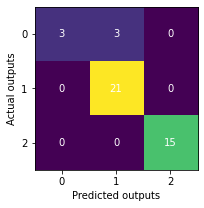

In [49]:
# heatmap that illustrates the confusion matrix with numbers and colors WOWFLAG

#  The number on the main diagonal show the number of correct predictions from the validation set.
#  Other numbers correspond to the incorrect predictions. 
cm_reglogreg = confusion_matrix(y_valid, y_pred_reglogreg)
fig, ax = plot.subplots(figsize=(3,3))
ax.imshow(cm_reglogreg)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_reglogreg[i, j], ha='center', va='center', color='white')
plot.show()

In [7]:
# Regularized Logistic Regression with L1-L2 penalty /glmnet/elasticNet
time0 = time.clock()
reglogreg2 = LogisticRegression(multi_class = 'multinomial', 
                               penalty = 'elasticnet',
                               l1_ratio = 0.55,
                               solver = 'saga',
                               C = 0.25,
                               tol = 0.001,
                               random_state = my_rands)
reglogreg2.fit(X_train, y_train.values.ravel())
y_pred_reglogreg2 = reglogreg2.predict(X_valid)
results_reglogreg2 = model_selection.cross_val_score(reglogreg2, X_train, y_train.values.ravel(), cv = kfold)
print(confusion_matrix(y_valid, y_pred_reglogreg2))
print(classification_report(y_valid, y_pred_reglogreg2))
print(results_reglogreg2.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, y_pred_reglogreg2)

[[ 3  3  0]
 [ 0 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.88      1.00      0.93        21
           2       1.00      1.00      1.00        15

    accuracy                           0.93        42
   macro avg       0.96      0.83      0.87        42
weighted avg       0.94      0.93      0.92        42

0.9388888888888888
  8.0 secs


0.9285714285714286

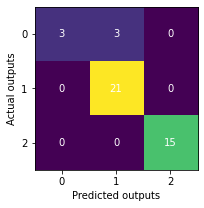

In [50]:
# heatmap that illustrates the confusion matrix with numbers and colors WOWFLAG

#  The number on the main diagonal show the number of correct predictions from the validation set.
#  Other numbers correspond to the incorrect predictions. 
cm_reglogreg2 = confusion_matrix(y_valid, y_pred_reglogreg2)
fig, ax = plot.subplots(figsize=(3,3))
ax.imshow(cm_reglogreg2)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_reglogreg2[i, j], ha='center', va='center', color='white')
plot.show()

In [8]:
# (Error-Correcting) Output-Code multiclass strategy
time0 = time.clock()
model_ec = OutputCodeClassifier(reglogreg, code_size = 5)
model_ec.fit(X_train, y_train.values.ravel())
y_pred_ec = model_ec.predict(X_valid)
print(confusion_matrix(y_valid, y_pred_ec))
print(classification_report(y_valid, y_pred_ec))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_ec = model_selection.cross_val_score(model_ec, X_train, y_train.values.ravel(), cv = kfold)
print(results_ec.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, y_pred_ec)

[[ 3  3  0]
 [ 0 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.88      1.00      0.93        21
           2       1.00      1.00      1.00        15

    accuracy                           0.93        42
   macro avg       0.96      0.83      0.87        42
weighted avg       0.94      0.93      0.92        42

0.9151851851851851
 58.7 secs


0.9285714285714286

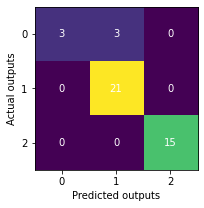

In [51]:
# heatmap that illustrates the confusion matrix with numbers and colors WOWFLAG

#  The number on the main diagonal show the number of correct predictions from the validation set.
#  Other numbers correspond to the incorrect predictions. 
cm_ec = confusion_matrix(y_valid, y_pred_ec)
fig, ax = plot.subplots(figsize=(3,3))
ax.imshow(cm_ec)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_ec[i, j], ha='center', va='center', color='white')
plot.show()

In [9]:
# Naive Bayes
time0 = time.clock()
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train.values.ravel())
nb_pred = nb.predict(X_valid)
nb_prob_pred = nb.predict_proba(X_valid)
print(confusion_matrix(y_valid, nb_pred))
print(classification_report(y_valid, nb_pred))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_nb = model_selection.cross_val_score(nb, X_train, y_train.values.ravel(), cv = kfold)
print(results_nb.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, nb_pred)

[[ 0  3  3]
 [ 0 18  3]
 [ 0  9  6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      0.86      0.71        21
           2       0.50      0.40      0.44        15

    accuracy                           0.57        42
   macro avg       0.37      0.42      0.38        42
weighted avg       0.48      0.57      0.51        42

0.6151851851851852
  0.6 secs


0.5714285714285714

In [10]:
# KNeighborsClassifier
time0 = time.clock()
model_kn = KNeighborsClassifier(n_neighbors=5,
                                  weights='uniform', 
                                  algorithm='auto', 
                                  leaf_size=30, p=2, metric='minkowski', 
                                  metric_params=None, n_jobs=None)
model_kn.fit(X_train, y_train.values.ravel())
kn_pred = model_kn.predict(X_valid)
print(confusion_matrix(y_valid, kn_pred))
print(classification_report(y_valid, kn_pred))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_kn = model_selection.cross_val_score(model_kn, X_train, y_train.values.ravel(), cv = kfold)

print(results_kn.mean())

#time0 = time.clock()
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))

accuracy_score(y_valid, kn_pred)

[[ 1  3  2]
 [ 0 20  1]
 [ 0 12  3]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.57      0.95      0.71        21
           2       0.50      0.20      0.29        15

    accuracy                           0.57        42
   macro avg       0.69      0.44      0.43        42
weighted avg       0.61      0.57      0.50        42

0.6092592592592593
  0.8 secs


0.5714285714285714

In [52]:
# # Gaussian Process Classifier
# time0 = time.clock()
# model_gpc = GaussianProcessClassifier(kernel=None, 
#                                       optimizer='fmin_l_bfgs_b', 
#                                       n_restarts_optimizer=100, 
#                                       max_iter_predict=10000, 
#                                       warm_start=True, 
#                                       copy_X_train=True, 
#                                       random_state=my_rands, 
#                                       multi_class='one_vs_rest', 
#                                       n_jobs=None)
# model_gpc.fit(X_train, y_train.values.ravel())
# gpc_pred = model_gpc.predict(X_valid)
# gpc_prob_pred = model_gpc.predict_proba(X_valid)
# print(confusion_matrix(y_valid, gpc_pred))
# print(classification_report(y_valid, gpc_pred))
# kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
# results_gpc = model_selection.cross_val_score(model_gpc, X_train, y_train.values.ravel(), cv = kfold)

# print(results_gpc.mean())

# #time0 = time.clock()
# time1 = (time.clock() - time0)
# print ("%5.1f secs" % (time1))

# accuracy_score(y_valid, gpc_pred)

In [ ]:
## Perceptron 
#time0 = time.clock()
#model_perc = Perceptron(
#    penalty = 'elasticnet', l1_ratio = 0.99,random_state = my_rands)
#model_perc.fit(X_train, y_train.values.ravel())
#y_pred_perc = model_perc.predict(X_valid)
#print(confusion_matrix(y_valid, y_pred_perc))
#print(classification_report(y_valid, y_pred_perc))
#kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
#results_perc = model_selection.cross_val_score(model_perc, X_train, y_train.values.ravel(), cv = kfold)
#print(results_perc.mean())
#time1 = (time.clock() - time0)
#print ("%5.1f secs" % (time1))
#accuracy_score(y_valid, y_pred_perc)

In [ ]:
# # Passive Aggressive Classifier 
# time0 = time.clock()
# model_pac = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, 
#                                          max_iter=1000, tol=0.001, 
#                                          early_stopping=False, validation_fraction=0.1, 
#                                          n_iter_no_change=5, shuffle=True, verbose=0, 
#                                          loss='hinge', n_jobs=None, random_state=my_rands, 
#                                          warm_start=False, class_weight=None, 
#                                          average=False)
# model_pac.fit(X_train, y_train.values.ravel())
# y_pred_pac = model_pac.predict(X_valid)
# print(confusion_matrix(y_valid, y_pred_pac))
# print(classification_report(y_valid, y_pred_pac))
# kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
# results_pac = model_selection.cross_val_score(model_pac, X_train, y_train.values.ravel(), cv = kfold)
# print(results_pac.mean())
# time1 = (time.clock() - time0)
# print ("%5.1f secs" % (time1))
# accuracy_score(y_valid, y_pred_pac)

In [53]:
# # Linear SVC Classifier 
# time0 = time.clock()
# model_lsvc = LinearSVC(penalty='l2', loss='hinge',
#                       dual=True, tol=0.0001, C=0.25, 
#                       multi_class='crammer_singer',  # 'crammer_singer', 'ovr'
#                       random_state=my_rands, max_iter=1000)
# model_lsvc.fit(X_train, y_train.values.ravel())
# lsvc_pred = model_lsvc.predict(X_valid)
# print(confusion_matrix(y_valid, lsvc_pred))
# print(classification_report(y_valid, lsvc_pred))
# kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
# results_lsvc = model_selection.cross_val_score(model_lsvc, X_train, y_train.values.ravel(), cv = kfold)
# print(results_lsvc.mean())
# time1 = (time.clock() - time0)
# print ("%5.1f secs" % (time1))
# accuracy_score(y_valid, lsvc_pred)

In [54]:
# # Multi-layer Perceptron classifier 
# time0 = time.clock()
# model_mlp = MLPClassifier(hidden_layer_sizes=1000, 
#                            activation= 'relu', #'relu',
#                            solver='adam', alpha=0.0001, 
#                            batch_size='auto', learning_rate='constant', 
#                            max_iter=300, random_state=my_rands, 
#                            validation_fraction=0.1, 
#                            beta_1=0.9, beta_2=0.999)
# model_mlp.fit(X_train, y_train.values.ravel())
# mlp_pred = model_mlp.predict(X_valid)
# print(confusion_matrix(y_valid, mlp_pred))
# print(classification_report(y_valid, mlp_pred))
# kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
# results_mlp = model_selection.cross_val_score(model_mlp, X_train, y_train.values.ravel(), cv = kfold)
# print(results_mlp.mean())
# time1 = (time.clock() - time0)
# print ("%5.1f secs" % (time1))
# accuracy_score(y_valid, mlp_pred)

In [16]:
# Bagged Decision Trees for Classification
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 3, 
                                                                  max_features = None,
                                                                  criterion = "entropy",
                                                                  random_state=my_rands), n_estimators=100,
                                                                  oob_score=True, bootstrap=True,
                                                                  random_state=my_rands)
results_1 = model_selection.cross_val_score(model_1, X_train, y_train.values.ravel(), cv=kfold)
print(results_1.mean())
model_1.fit(X_train, y_train.values.ravel())
pred_bag_ds = model_1.predict(X_valid)
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_bag_ds)

0.857037037037037
 61.5 secs


0.7619047619047619

In [17]:
# Random Forest
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_rf = RandomForestClassifier(n_estimators=700,
                                  warm_start= True,
                                  random_state=my_rands,
                                  max_features = None)
results_rf = model_selection.cross_val_score(model_rf, X_train, y_train.values.ravel(), cv=kfold)
print(results_rf.mean())
model_rf.fit(X_train, y_train.values.ravel())
pred_bag_rf = model_rf.predict(X_valid)

time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_bag_rf)

0.8474074074074074
215.6 secs


0.7380952380952381

In [18]:
# Bagged with Regularized Logistic Regression
time0 = time.clock()

kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_bag_reglogreg_hard = BaggingClassifier(LogisticRegression(multi_class = 'multinomial', 
                                                                   penalty = 'l1',
                                                                   solver = 'saga',
                                                                   C = 0.215,
                                                                   random_state = my_rands),
                                            n_estimators=50, oob_score=True, bootstrap=True,
                                            random_state=my_rands)
results_bag_reglogreg_hard = model_selection.cross_val_score(model_bag_reglogreg_hard, 
                                                             X_train, y_train.values.ravel(), cv=kfold)
print(results_bag_reglogreg_hard.mean())
model_bag_reglogreg_hard.fit(X_train, y_train.values.ravel())
pred_bag_reglogreg_hard = model_bag_reglogreg_hard.predict(X_valid)
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_bag_reglogreg_hard)

0.9077777777777778
341.2 secs


0.8809523809523809

In [19]:
# extraTree
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_et = ExtraTreesClassifier(n_estimators=500,
                                max_features = None,
                                random_state = my_rands)
results_et = model_selection.cross_val_score(model_et, X_train, y_train.values.ravel(), cv=kfold)
print(results_et.mean())
model_et.fit(X_train, y_train.values.ravel())
pred_bag_et = model_et.predict(X_valid)
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_bag_et)

0.8814814814814814
 67.4 secs


0.8095238095238095

In [20]:
# Adaptive Boosting(AdaBoost) 
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, 
                                                      max_features = None,
                                                      criterion = "entropy",
                                                      random_state=my_rands),
                                                      n_estimators=500,
                                                      learning_rate = 1,
                                                      algorithm="SAMME.R",
                                                      random_state=my_rands)
results_ada = model_selection.cross_val_score(model_ada, X_train, y_train.values.ravel(), cv=kfold)
print(results_ada.mean())
model_ada.fit(X_train, y_train.values.ravel())
pred_ada = model_ada.predict(X_valid)
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_ada)

0.81
119.4 secs


0.6428571428571429

In [21]:
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_ada_hard = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, 
                                                           max_features = None,
                                                           criterion = "entropy",
                                                           random_state=my_rands),
                                                           n_estimators=500,
                                                           learning_rate = 1,
                                                           algorithm="SAMME",
                                                           random_state=my_rands)
results_ada_hard = model_selection.cross_val_score(model_ada_hard, X_train, y_train.values.ravel(), cv=kfold)
print(results_ada_hard.mean())
model_ada_hard.fit(X_train, y_train.values.ravel())
pred_ada_hard = model_ada_hard.predict(X_valid)
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_ada_hard)

0.784814814814815
 17.4 secs


0.7857142857142857

In [22]:
# AdaBoost with SVM as Base Learner
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_ada_svm = AdaBoostClassifier(SVC(kernel='linear',
                                       probability=True),
                                       n_estimators=100,
                                       learning_rate = 0.1,
                                       algorithm="SAMME.R",
                                       random_state=my_rands)
results_ada_svm = model_selection.cross_val_score(model_ada_svm, 
                                                X_train, y_train.values.ravel(), 
                                                cv=kfold)
print(results_ada_svm.mean())
model_ada_svm.fit(X_train, y_train.values.ravel())
pred_ada_svm = model_ada_svm.predict(X_valid)
time1 = (time.clock() - time0)
print("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_ada_svm)

0.6570370370370372
 16.5 secs


0.6190476190476191

In [23]:
# Stochastic Gradient Boosting 
time0 = time.clock()
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
model_sgb = GradientBoostingClassifier(loss='deviance', 
                                       learning_rate=0.1, 
                                       n_estimators=150, subsample=1.0, 
                                       min_samples_leaf=10, 
                                       max_depth=3, 
                                       random_state=my_rands
                                      )
results_sgb = model_selection.cross_val_score(model_sgb, X_train, y_train.values.ravel(), cv=kfold)
print(results_sgb.mean())
model_sgb.fit(X_train, y_train.values.ravel())
pred_sgb = model_sgb.predict(X_valid)
time1 = (time.clock() - time0)
print("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_sgb)

0.8674074074074074
166.7 secs


0.8095238095238095

In [24]:
# xgBoost
time0 = time.clock()
model_xgb = xgboost.XGBClassifier(objective= 'multi:softprob',
                                  n_estimators = 100,
                                  max_depth = 1,
                                  learning_rate = 0.4,
                                  reg_alpha = 0,
                                  booster = 'dart', # dart' gbtree
                                  eval_metric='merror',
                                  subsample = 1,
                                  colsample_bytree = 0.8,
                                  tree_method = 'exact',
                                  random_state=my_rands)
model_xgb.fit(X_train, y_train.values.ravel())
pred_xgb = model_xgb.predict(X_valid)
print(confusion_matrix(y_valid, pred_xgb))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_xgb = model_selection.cross_val_score(model_xgb,
                                              X_train, y_train.values.ravel(), 
                                              cv=kfold)
print(results_xgb.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
print(accuracy_score(y_valid, pred_xgb))

[[ 1  5  0]
 [ 0 21  0]
 [ 0  2 13]]
0.8748148148148147
 17.9 secs
0.8333333333333334


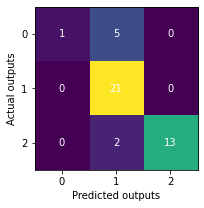

In [56]:
cm_xgb = confusion_matrix(y_valid, pred_xgb)
fig, ax = plot.subplots(figsize=(3,3))
ax.imshow(cm_xgb)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_xgb[i, j], ha='center', va='center', color='white')
plot.show()

In [25]:
# lightgbm
time0 = time.clock()
model_lgb = lgb.LGBMClassifier(objective = 'multiclass', 
                           boosting_type='gbdt', 
                           learning_rate = 0.05,
                           subsample=1,
                           reg_alpha = 0.,
                           reg_lambda = 0.,
                           max_depth = 1,
                           metric = 'multi_logloss',
                           n_estimators = 400,
                           random_state=my_rands)
model_lgb.fit(X_train, y_train.values.ravel())
pred_lgb = model_lgb.predict(X_valid)
print(confusion_matrix(y_valid, pred_lgb))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_lgb = model_selection.cross_val_score(model_lgb,
                                              X_train, y_train.values.ravel(), 
                                              cv=kfold)
print(results_lgb.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
print(accuracy_score(y_valid, pred_lgb))

[[ 2  4  0]
 [ 0 21  0]
 [ 0  2 13]]
0.8777777777777777
 14.2 secs
0.8571428571428571


In [26]:
# Voting Ensemble
time0 = time.clock() 
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
estimators = []
#estimators.append(('L1LogReg', reglogreg))
estimators.append(('ElasticNetLogReg', reglogreg2))
estimators.append(('errorCorrect', model_ec))
#estimators.append(('xgboost', model_xgb)) 
estimators.append(('lgbm', model_lgb)) 


voting_ensemble = VotingClassifier(estimators,
                                   voting = 'hard')
results_vc = model_selection.cross_val_score(voting_ensemble, X_train, y_train.values.ravel(), cv=kfold)
print(results_vc.mean())
voting_ensemble.fit(X_train, y_train.values.ravel())
pred_vote_ensemble = voting_ensemble.predict(X_valid)
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
accuracy_score(y_valid, pred_vote_ensemble)

0.9318518518518517
 81.5 secs


0.9285714285714286

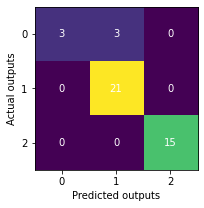

In [57]:
cm_vote = confusion_matrix(y_valid, pred_vote_ensemble)
fig, ax = plot.subplots(figsize=(3,3))
ax.imshow(cm_vote)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_vote[i, j], ha='center', va='center', color='white')
plot.show()

In [27]:
# Stacking: super-learner
def get_stacking():
    level0 = list()   
    
    level0.append(('L1LogReg', reglogreg)) 
    level0.append(('ElasticNetLogReg', reglogreg2))
    #level0.append(('errorCorrect', model_ec))
    level0.append(('lgbm', model_lgb)) 
    level0.append(('xgboost', model_xgb)) 
    
    level1 = RandomForestClassifier()
    #level1 = KNeighborsClassifier()
    #level1 = LogisticRegression() 
        
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model

time0 = time.clock()
stackedmodel = get_stacking()
stackedmodel.fit(X_train, y_train.values.ravel())
pred_stack_ensemble = stackedmodel.predict(X_valid)
print(confusion_matrix(y_valid, pred_stack_ensemble))
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_stack = model_selection.cross_val_score(stackedmodel,
                                              X_train, y_train.values.ravel(), 
                                              cv=kfold)
print(results_stack.mean())
time1 = (time.clock() - time0)
print ("%5.1f secs" % (time1))
print(accuracy_score(y_valid, pred_stack_ensemble))

[[ 4  2  0]
 [ 0 21  0]
 [ 1  0 14]]
0.9592592592592593
528.6 secs
0.9285714285714286


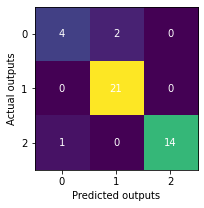

In [58]:
cm_stack = confusion_matrix(y_valid, pred_stack_ensemble)
fig, ax = plot.subplots(figsize=(3,3))
ax.imshow(cm_stack)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_stack[i, j], ha='center', va='center', color='white')
plot.show()

We try different ways of formulating the super learner and list the results in the following table. We shall notice that adding levels in the stack can either be data expensive (we need to spare the out-of-fold data to train each level, and hence more data are needed) or time expensive (if k-folds like technique is used and, then, lot of models need to be fitted). By considering both computational time and prediction accuracy, we end up using Random Forest Classifier as the "blender" and xgboost, lightgbm, L1-penalized logistic regression and ElasticNet Logistic Regression as base learners.

|                  Level 0   (Base Classifiers)                 |         Level 1        | Cross   Validation Score | Accuracy on   Validation Set |  Time (seconds) |
|:-------------------------------------------------------------:|:----------------------:|:------------------------:|:----------------------------:|:------:|
|                       lightgbm, L1LogReg                      |   LogisticRegression   |        0.904814815       |          0.904761905         |  213.9 |
|                                                               | RandomForestClassifier |        0.921851852       |          0.952380952         |  227.1 |
|                  xgboost, lightgbm, L1LogReg                  |   LogisticRegression   |        0.898148148       |          0.880952381         |  409.7 |
|                                                               | RandomForestClassifier |        0.939259259       |          0.952380952         |  409.3 |
|                                                               |  KNeighborsClassifier  |        0.911851852       |          0.952380952         |  403.7 |
|              lightgbm, L1LogReg, ElasticNetLogReg             |   LogisticRegression   |        0.921851852       |          0.928571429         |  281.4 |
|                                                               | RandomForestClassifier |        0.962592593       |          0.928571429         |  293.2 |
|                                                               |  KNeighborsClassifier  |        0.928518519       |          0.952380952         |  289.2 |
|         ***xgboost, lightgbm, L1LogReg, ElasticNetLogReg***         |   LogisticRegression   |        0.914814815       |          0.928571429         |  476.8 |
|                                                               | ***RandomForestClassifier*** |        ***0.956296296***      |          ***0.952380952***        |   474  |
|                                                               |  KNeighborsClassifier  |        0.921851852       |          0.952380952         |  523.5 |
| xgboost, lightgbm, L1LogReg,   ElasticNetLogReg, errorCorrect |   LogisticRegression   |        0.921851852       |          0.928571429         | 1183.5 |
|                                                               | RandomForestClassifier |        0.952222222       |          0.928571429         | 1251.1 |
|                                                               |  KNeighborsClassifier  |        0.915185185       |          0.880952381         | 1087.3 |

## 4. Evaluation and Comparison over the Models 

We can now rank our evaluation of all the models to choose the best candidates for our problem. We list some of the candidates in the following table, we could see that overall the decision tree based methods have better prediction accuracy. But the regularized logistic regression is working the best among all individual models. Compare to all other black-box models, it is interpretable and takes less computational time. The regularization guarantees the sparsity of the final model and results in a clean form. It is indeed an ideal final candidate. 

If we care more about the final prediction accuracy, we might want to keep using the staking model, where we borrows different strength from all the selected learners.


| NO. |                            Learners                            | Cross   Validation Score | Accuracy on   Validation Set |     Tag    | Time(secs) |
|:---:|:--------------------------------------------------------------:|:------------------------:|:----------------------------:|:----------:|:----------:|
|  1  |                LogisticRegression   Multinomial                |        0.697777778       |          0.666666667         | Individual |     68     |
|  2  |                    LogisticRegression   OVR                    |        0.687407407       |          0.619047619         | Individual |    135.8   |
|  3  |                             Ridge                              |        0.704444444       |          0.619047619         | Individual |     0.8    |
|  4  |               L1   Regularized LogisticRegression              |  ***0.952222222222222*** |    ***0.928571428571428***   | Individual |     7.5    |
|  5  |           ElasticNet   Regularized LogisticRegression          |  ***0.938888888888888*** |    ***0.928571428571428***   | Individual |     7.8    |
|  6  | (Error-Correcting_reglogreg)   Output-Code multiclass strategy |  ***0.931851851851851*** |    ***0.952380952380952***   |   Bagging  |    52.8    |
|  7  |                          Naive   Bayes                         |        0.615185185       |          0.571428571         | Individual |     0.7    |
|  8  |                               KNN                              |        0.609259259       |          0.571428571         | Individual |     1.1    |
|  9  |                          Bagging Trees                         |        0.857037037       |          0.761904762         |   Bagging  |     57     |
|  10 |                          Random Forest                         |        0.847407407       |          0.738095238         |   Bagging  |    278.3   |
|  11 |                               SGB                              |        0.867407407       |          0.80952381          |  Boosting  |    151.8   |
|  12 |                    Regularized   Perceptron                    |        0.711111111       |          0.666666667         | Individual |     0.4    |
|  13 |                    Multi-layer   Perceptron                    |           0.62           |          0.595238095         | Individual |    43.4    |
|  14 |                 Passive   Aggressive Classifier                |        0.712222222       |          0.642857143         | Individual |     0.3    |
|  15 |                    SVC   with Linear Kernel                    |        0.743333333       |          0.642857143         | Individual |     0.4    |
|  16 |                        AdaBoost   of SVM                       |        0.630740741       |          0.619047619         |  Boosting  |    45.2    |
|  17 |                 AdaBoost   Trees Soft Endemble                 |           0.81           |          0.642857143         |  Boosting  |    170.5   |
|  18 |                 AdaBoost   Trees Hard Endemble                 |        0.784814815       |          0.785714286         |  Boosting  |    17.7    |
|  19 |                             xgboost                            |  ***0.874814814814814*** |    ***0.833333333333333***   |  Boosting  |    15.5    |
|  20 |                            lightgbm                            |  ***0.877777777777777*** |    ***0.857142857142857***   |  Boosting  |     3.7    |
|  21 |                Bagging   of Regularized Logistic               |        0.907777778       |          0.880952381         |   Bagging  |    121.2   |
|  22 |                           ExtraTrees                           |        0.884444444       |          0.80952381          |   Bagging  |    72.9    |
|  23 |                        Voting   Ensemble                       |  ***0.931851851851851*** |    ***0.928571428571428***   |   Bagging  |    107.1   |
|  24 |                       Stacking   Ensemble                      |  ***0.962962962962963*** |   ***0.9523809523809523***   |  Stacking  |    523.5   |

To have a closer look over the models we have tried, we compare some similar models by checking their accuracy score. The following figures show the boxplot for the repeated cross-validated accuracy scores from related models. We should always choose the ones that have higher accuracy and stable predicted behaviors.

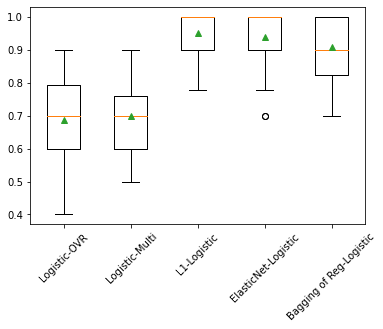

In [28]:
# evaluate the model combo 1: logistic regression related.
result_comb1 =[pd.DataFrame(results_cv_ovr),
               pd.DataFrame(results_cv),
               pd.DataFrame(results_reglogreg),
               pd.DataFrame(results_reglogreg2),               
               pd.DataFrame(results_bag_reglogreg_hard)]
result_comb1 = pd.concat(result_comb1, axis=1)
names = ['Logistic-OVR', ' Logistic-Multi',
        'L1-Logistic', 'ElasticNet-Logistic',
         'Bagging of Reg-Logistic']
result_comb1.columns = names
plot.boxplot(result_comb1, labels=names, showmeans=True)
plot.xticks(rotation = 45)
plot.show()

We should keep the $L_1$-regularized logistic regression instead of others.

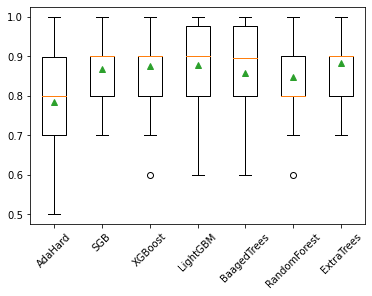

In [29]:
# evaluate the model combo 2: Decision Tree related, with boosting/bagging techs.
result_comb2 =[pd.DataFrame(results_ada_hard),
               pd.DataFrame(results_sgb),
               pd.DataFrame(results_xgb),
               pd.DataFrame(results_lgb),
               pd.DataFrame(results_1),
               pd.DataFrame(results_rf),
               pd.DataFrame(results_et)
              ]
result_comb2 = pd.concat(result_comb2, axis=1)
names = ['AdaHard', 'SGB', 'XGBoost', 'LightGBM', # these are boosting 
         'BaagedTrees',  'RandomForest','ExtraTrees' # these are bagging
        ]
result_comb2.columns = names
plot.boxplot(result_comb2, labels=names, showmeans=True)
plot.xticks(rotation = 45)
plot.show()

We could see that boosting ensemble trees have better results in predictig accuracy, and in general bagging with more randomness results in more stable results. 

<Figure size 432x288 with 0 Axes>

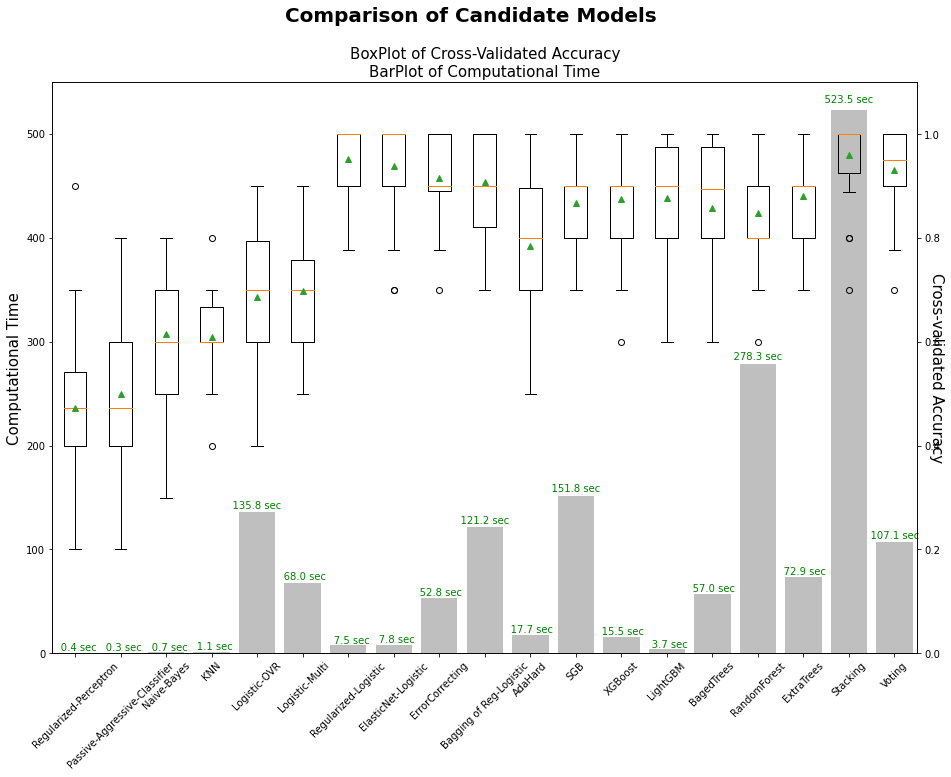

In [30]:
# evaluate the model combo 3: All together
result_comb3 =[ pd.DataFrame(results_perc),#1
                pd.DataFrame(results_pac), #2
               pd.DataFrame(results_nb),#3
               pd.DataFrame(results_kn),#4
                pd.DataFrame(results_cv_ovr),#5
                pd.DataFrame(results_cv),#6
                pd.DataFrame(results_reglogreg),#7
               pd.DataFrame(results_reglogreg2),
               pd.DataFrame(results_ec),
                pd.DataFrame(results_bag_reglogreg_hard),#8
               pd.DataFrame(results_ada_hard),#10
               pd.DataFrame(results_sgb),#11
               pd.DataFrame(results_xgb),#12
               pd.DataFrame(results_lgb),#13
               pd.DataFrame(results_1),#14
               pd.DataFrame(results_rf),#15
               pd.DataFrame(results_et),#16
                pd.DataFrame(results_stack),#17
                pd.DataFrame(results_vc)#18
              ]
result_comb3 = pd.concat(result_comb3, axis=1)
names = ['Regularized-Perceptron',
         'Passive-Aggressive-Classifier',
         'Naive-Bayes',
         'KNN',
         'Logistic-OVR', ' Logistic-Multi',
         'Regularized-Logistic', 'ElasticNet-Logistic',
         'ErrorCorrecting',
         'Bagging of Reg-Logistic', 
         'AdaHard', 'SGB', 'XGBoost', 'LightGBM',  
         'BagedTrees',  'RandomForest','ExtraTrees',  
         'Stacking', 'Voting']
time_rec = [0.4, 
            0.3, 
            0.7,
            1.1,
            135.8, 68,
            7.5, 7.8, 
            52.8,
            121.2, 
            17.7, 151.8, 15.5, 3.7, 
            57, 278.3, 72.9, 
            523.5, 107.1]
result_comb3.columns = names

fig = plot.gcf()
fig, ax = plot.subplots()
fig.set_size_inches(15.5, 10.5, forward=True)
fig.suptitle('Comparison of Candidate Models', fontsize=20, fontweight='bold')
rects = ax.bar(range(1, len(time_rec)+1), time_rec, color='gray', 
               alpha = 0.5, align='center')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/3., 1.01*height,
                "%9.1f sec" % (height),
                color = 'green',
                ha='center', va='bottom')
        
autolabel(rects)
ax.set_ylabel('Computational Time', size = 15)
ax.set_title('BoxPlot of Cross-Validated Accuracy\nBarPlot of Computational Time', size = 15)
plot.xticks(rotation = 45)
ax2 = ax.twinx()
ax2.boxplot(result_comb3, labels=names, showmeans=True)
ax2.set_ylim(0, 1.1)
ax2.set_ylabel('Cross-validated Accuracy', size = 15, rotation=270)

plot.show()

In this big plot, we overlay the box plots for cross-validated accuracy results from candidate methods, together with the bar plot of running time each model takes. We could conclude that some individual methods could achieve accurate results, and using ensemble techniques could improve both accuracy and stablize the prediction, with a sacrifice in computational time. And the best candidates are $L_1$-regularized logistic regression and stacking.

## 5. A Deeper Look at the Data

As we have seen there exist multicollinearity, and potential sparsity in the data, we want to figure out the importances of the various features in the data. We could see that feature No.500, No.125, No. 361, and No. 461 have been important in buiding the models.

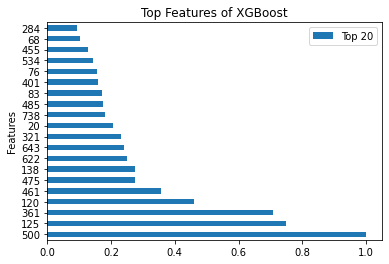

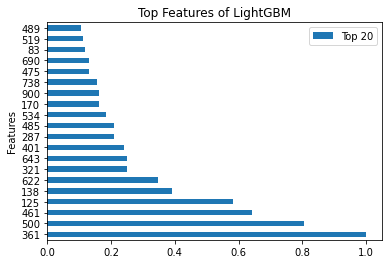

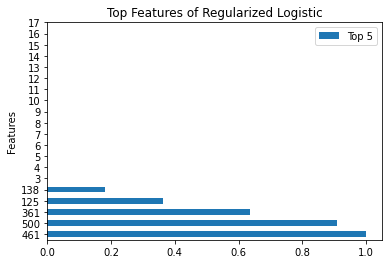

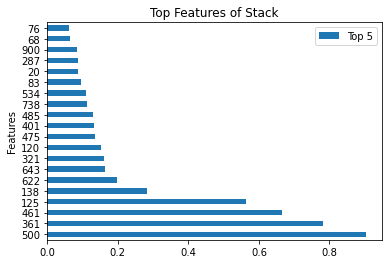

In [31]:
### What features are important ones?

xgb_imp = model_xgb.feature_importances_
lgb_imp = model_lgb.feature_importances_
# perform permutation importance 
reglogreg_imp = permutation_importance(reglogreg, X_train, y_train, scoring='accuracy')
# get importance
reglogreg_imp = reglogreg_imp.importances_mean
# calculate the relavant importance
xgb_imp = xgb_imp / xgb_imp.max()
lgb_imp = lgb_imp / lgb_imp.max()
reglogreg_imp = reglogreg_imp / reglogreg_imp.max()
# into a DataFrame
featureImp_df = pd.DataFrame({
        'feature_names':X_train.columns,
        'xgb_features': xgb_imp,
        'lgb_features': lgb_imp,
        'reglogreg_features': reglogreg_imp
})
# Average Feature Importances: add a column to calculate row-wise mean
featureImp_df['mean'] = featureImp_df.mean(axis = 1)
fig, ax = plot.subplots()
ax = pd.Series(featureImp_df['xgb_features'], index=X.columns).nlargest(20).plot(kind='barh')
ax.set_ylabel('Features')
ax.set_title('Top Features of XGBoost')
ax.set_yticks(np.arange(20))
ax.set_yticklabels(featureImp_df.nlargest(20, 'xgb_features')['feature_names'].to_numpy())
ax.legend(['Top 20'])
plot.show()

fig, ax = plot.subplots()
ax = pd.Series(featureImp_df['lgb_features'], index=X.columns).nlargest(20).plot(kind='barh')
ax.set_ylabel('Features')
ax.set_title('Top Features of LightGBM')
ax.set_yticks(np.arange(20))
ax.set_yticklabels(featureImp_df.nlargest(20, 'lgb_features')['feature_names'].to_numpy())
ax.legend(['Top 20'])
plot.show()
fig, ax = plot.subplots()
ax = pd.Series(featureImp_df['reglogreg_features'], index=X.columns).nlargest(5).plot(kind='barh')
ax.set_ylabel('Features')
ax.set_title('Top Features of Regularized Logistic')
ax.set_yticks(np.arange(20))
ax.set_yticklabels(featureImp_df.nlargest(20, 'reglogreg_features')['feature_names'].to_numpy())
ax.legend(['Top 5'])
plot.show()

fig, ax = plot.subplots()
ax = pd.Series(featureImp_df['mean'], index=X.columns).nlargest(20).plot(kind='barh')
ax.set_ylabel('Features')
ax.set_title('Top Features of Stack')
ax.set_yticks(np.arange(20))
ax.set_yticklabels(featureImp_df.nlargest(20, 'mean')['feature_names'].to_numpy())
ax.legend(['Top 5'])
plot.show()



## 6. Internpretation using $L_1$-Regularized Logistic Regression Model

Among all of the candidates, the $L_1$-regularized logistic regression achieves best prediction accurcy on validation data set and only takes 2.4 seconds in computation. When dealing with real world data, we might want to keep the interpretability and simplicity of the methods we applied. Just as ***Occam's razor*** indicates, "the simplest explanation is usually the best one". So we keep using the regularized logistic regression for interpretation. 

First, we need to train the model with all available train data. We set the he "multi\_class" argument to "multinomial" and the “solver'' argument to "saga". To ensure that cross-validation fold has approximately the same distribution of examples in each class as the whole training dataset, we use a stratified 10-fold cross-validation with 3 repeats. And the reported mean classification accuracy across all folds and repeats of the evaluation procedure with a value of 0.962.

In our regularized logistic regression, we implement a regularized logistic regression with $L_1$ penalty. For the inverse of regularization strength parameter, the rather small value of $C = 0.25$ constrains the model heavily. In the case with $L_1$ penalty, this leads to a very sparse solution with very few features left. In our case, there are 3 categories in total, and there is one function fitted for each class
respectively, which acts as independent binary regression models:
$
f(k, i) 
= \beta_{0,k} + \beta_{1,k}x_{i,1} + \cdots + \beta_{M,k}x_{i,M}
$
where $\beta_{m,k}$ is regression coefficient associated with category $k$ and feature $m$ except for $\beta_{0,k}$ is the intercept of category $k$, and $x_{i,m}$ is the $i$-the subject's feature $m$. The actual output from sklearn is 
$log(P(y = k) / 1 - P(y = k))$. So by exponentiating each regressor coefficient, we get odds ratios. So interpretation of the coefficients is, for one unit change in the feature, the log of
odds will change by a factor indicated by the output coefficient, given that all other variables
are held constant. Take label 0 for example, the odds ratio for feature is 0.998626, which means for every one unit of increase in this feature, we have 0.998626 more nats of evidence that the label should be 0 than other labels.


In [32]:
# Final Fit with all train data
model = LogisticRegression(multi_class = 'multinomial', 
                           penalty='l1', 
                           C=0.25,
                           random_state=my_rands, solver='saga'
                          )

                    
                    
model.fit(X, y.values.ravel())
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results = model_selection.cross_val_score(model, X, y.values.ravel(), cv = kfold, scoring = 'accuracy')
print(results.mean()) 
sparsity = np.mean(model.coef_ == 0) * 100
print("Sparsity with L1 penalty: %.2f%%" % sparsity)

# model parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
odds_ratio = pd.DataFrame(np.exp(model.coef_))
# print the odds ratio with features that really matters for each category
category_1_or = odds_ratio.iloc[0, odds_ratio.columns[odds_ratio.iloc[0,] != 1.0]].tolist()
category_2_or = odds_ratio.iloc[1, odds_ratio.columns[odds_ratio.iloc[1,] != 1.0]].tolist()
category_3_or = odds_ratio.iloc[2, odds_ratio.columns[odds_ratio.iloc[2,] != 1.0]].tolist()

print('Category 1 Odds Ratio:')
print(category_1_or)

0.9619047619047618
Sparsity with L1 penalty: 98.42%
Intercept: 
 [-0.69072191  0.96838523 -0.27766333]
Coefficients: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Category 1 Odds Ratio:
[0.9986255417614971, 1.012958969491312, 0.9883930756753966, 1.0346685851369128, 0.974316225618021, 0.7985649323244338, 1.1053875022110993, 0.9614335052528309, 1.4106408401267014, 1.0299867743282822, 0.9412606953769135, 0.7641597651595334, 1.1311508728667352, 1.0745968754697541, 1.0239540665070666, 1.1051738398130968]


## 7. Predict over Test Data Set

As we argued, if we are looking for the best prediction, we will keep using the staking model. But in reality, we might want to compromise between the accuracy and other benefits, like the interpretability of the model, and less computational request. So the final candidates should be either the stacking model, or the $L_1$-regularized logistic regression, depending on our priority.

It is worthwhile to mention that I found the Maximum Uncertainty LDA and Factor-Based LDA are working well and both have achieved very high accuracy when making predictions. Unfortunately, neither of the methods are implemented in *sklearn* to my best knowledge. So I have to train these models in *R* and have found even if we don't incorporate their results into stacking or voting ensembles, they still produce good predictions. We could of course incorporate the results and ensemble them into our current stacking ensemble or voting emsemble, but we might want to keep the simple form and save training time.

In [33]:
# if we choose voting ensemble as our final model: use all train data
voting_ensemble.fit(X, y.values.ravel())
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_vote = model_selection.cross_val_score(voting_ensemble,
                                              X, y.values.ravel(), 
                                              cv=kfold)
print(results_vote.mean())
#pred_values_voting = voting_ensemble.predict_proba(X_test)
#pred_values_voting = pd.DataFrame(pred_values_voting)
pred_class_voting = voting_ensemble.predict(X_test)
voting_submission = pd.DataFrame({"class":pred_class_voting})
# comparing the two distributions
#plot.hist(y, bins = 'auto', density = True, alpha=0.5, label='Train Distribution')
#plot.hist(voting_submission,  density = True, alpha=0.5, label='Test Distribution')
#plot.legend(loc='upper right')
#plot.title("Distribution of Train/Test Data with Voting Ensemble")
#plot.show()

0.9404761904761905


In [34]:
# if we choose stack ensemble: use all train data 

stackedmodel.fit(X, y.values.ravel())
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_stack = model_selection.cross_val_score(stackedmodel,
                                              X, y.values.ravel(), 
                                              cv=kfold)
print(results_stack.mean())
pred_values_stack = stackedmodel.predict_proba(X_test)
pred_values_stack = pd.DataFrame(pred_values_stack)
pred_class_stack = stackedmodel.predict(X_test)
stack_submission = pd.DataFrame({"class":pred_class_stack})
#stack_submission.to_csv('test_predictions.csv', index=False, header = False)
# comparing the two distributions
#plot.hist(y, bins = 'auto', density = True, alpha=0.5, label='Train Distribution')
#plot.hist(stack_submission,  density = True, alpha=0.5, label='Test Distribution')
#plot.legend(loc='upper right')
#plot.title("Distribution of Train/Test Data with Logistic Stack Ensemble")
#plot.show()

0.9523809523809524


In [35]:
# if we choose error correcting model 
# first we need to re-train the model with all training data                    
model_ec.fit(X, y.values.ravel())
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_ec = model_selection.cross_val_score(model_et, X, y.values.ravel(), cv = kfold, scoring = 'accuracy')
print(results_ec.mean()) 
pred_class_ec = model_ec.predict(X_test)
#model_submission_ec = pd.DataFrame({"class":pred_class_ec})
#model_submission_ec.to_csv('test_predictions_ec.csv', index=False, header = False)
# comparing the two distributions
#plot.hist(y, bins = 'auto', density = True, alpha=0.5, label='Train Distribution')
#plot.hist(model_submission_ec,  density = True, alpha=0.5, label='Test Distribution')
#plot.legend(loc='upper right')
#plot.title("Distribution of Train/Test Data with Error Coding")
#plot.show()

0.8809523809523809


In [36]:
# if we choose ElasticNet model
# first we need to re-train the model with all training data         
model_en = reglogreg2
model_en.fit(X, y.values.ravel())
kfold = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=my_rands)
results_en = model_selection.cross_val_score(model_en, X, y.values.ravel(), cv = kfold, scoring = 'accuracy')
print(results_en.mean()) 
pred_class_en = model_en.predict(X_test)
model_submission_en = pd.DataFrame({"class":pred_class_en})
#model_submission_en.to_csv('test_predictions_en.csv', index=False, header = False)
# comparing the two distributions
#plot.hist(y, bins = 'auto', density = True, alpha=0.5, label='Train Distribution')
#plot.hist(model_submission_en,  density = True, alpha=0.5, label='Test Distribution')
#plot.legend(loc='upper right')
#plot.title("Distribution of Train/Test Data with Error Coding")
#plot.show()

0.9476190476190475


In [38]:
# if we choose L1-Logistic model 
results_model = model_selection.cross_val_score(model,X, y.values.ravel(), cv=kfold)
print(results_model.mean())
pred_class_ = model.predict(X_test)
model_submission = pd.DataFrame({"class":pred_class_})
model_submission.to_csv('test_predictions_model.csv', index=False, header = False)
# comparing the two distributions
#plot.hist(y, bins = 'auto', density = True, alpha=0.5, label='Train Distribution')
#plot.hist(model_submission,  density = True, alpha=0.5, label='Test Distribution')
#plot.legend(loc='upper right')
#plot.title("Distribution of Train/Test Data with L1-Regularized Logistic Regression")
#plot.show()

0.9619047619047618


### Post-Study of Predictions

We could further investigate the final predictions by comparing yhe empirical distributions of train labels and test labels. One basic logic in any data analysis practice with a goal of prediction is that, the train set and test set are from the same population(some underlying unknown) distribution. This provides us with another simple way to check our predictions from a Statistical point of view. The idea is to regard the labels as multinomial, then we could formulate a hypothesis where the probability of each outcome is the same in the two empirical distributions(train label and predicted test label). The idea is to conduct a Karl Pearson's Chi-Square test to check the goodness-of-fit and determine whether they appear to come from the same underlying distribution. But all of the selected methods are producing close results, and it is hard to reject the null hypothesis where we assume the predicted test labels and the train labels are from the same multinomial distribution, and the statistical inference is not that informative in this case. 

We could instead consider to measure the relative entropy between the two distributions using \textit{Kullback-Leibler Divergence} from Information Theory. Generally, the Kullback-Leibler Divergence measures the inefficiency caused by the approximation, and hence it is often useful to think of this relative entropy as a "distance" between the two distributions. Given two probability distributions $q(y)$ and $p(y)$, the \textit{KL}-divergence for discrete variable is defined as
$$
	D_{KL}(P||Q) = \sum_i P(i) \log \frac{P(i)}{Q(i)}
$$
A smaller value indicates the second distribution being more similar to the first distribution.

In [39]:
# KL-divergence between predicted label distribution and train label distribution

def KL_divergence(emp_pred, emp_train):
    return (emp_train * np.log(emp_train / emp_pred)).sum()

# train/predicted test label empirical probability distribution
emp1      = stats.relfreq(y, numbins = 3).frequency
emp_model = stats.relfreq(pred_class_,       numbins = 3).frequency
emp_en    = stats.relfreq(pred_class_en,     numbins = 3).frequency
emp_vote  = stats.relfreq(pred_class_voting, numbins = 3).frequency
emp_stack = stats.relfreq(pred_class_stack,  numbins = 3).frequency
emp_ec    = stats.relfreq(pred_class_ec,     numbins = 3).frequency

# calculate the KL divergence of diffrent predictions
kl_model = KL_divergence(emp_model, emp1)
kl_en    = KL_divergence(emp_en,    emp1)
kl_vote  = KL_divergence(emp_vote,  emp1)
kl_stack = KL_divergence(emp_stack, emp1)
kl_ec    = KL_divergence(emp_ec,    emp1)

print("KL Divergence for L1Reg Model: ", kl_model)
print("KL Divergence for ElaNetModel: ", kl_en)
print("KL Divergence for EC    Model: ", kl_ec )
print("KL Divergence for Vote  Model: ", kl_vote)
print("KL Divergence for Stack Model: ", kl_stack)


KL Divergence for L1Reg Model:  0.005543949712871452
KL Divergence for ElaNetModel:  0.013705298621531022
KL Divergence for EC    Model:  0.04287257191446523
KL Divergence for Vote  Model:  0.01594287185929872
KL Divergence for Stack Model:  0.0039024812738532658


|Methods|KL-Divergence (Descending)|
|:--|:--|
| Error Correcting   (*in Python*)                | 0.05739005358698904   |
| ElasticNet Logistic Regression (*in Python*)    | 0.013705298621531022  |
| Voting             (*in Python*)                | 0.011384370611075025  |
| Logit Boosting Trees(*in R*)                    | 0.005768591149        |
| L1-Regularized Logistic Regression (*in Python*)| 0.005543949712871452  |
| Stacking           (*in Python*)                | ***0.0035148908655192185*** |
| Factor-Based LDA(*in R*)                        | 0.0001705475648       |
| Maximum Uncertainty LDA(*in R*)                 | ***0.00003280012858***      |
   
Based on the results, among the methods available in *Python's sklearn*, stacking emseble is behaving the best, and our Regularized Logistic regression behaves similar to voting ensemble, but it keeps a simpler form and makes it easy to interprete and saves computational time and memory, with some sacrifice in accuracy when reproducing the label distribution.

I end up using the stacking in predicting test labels, the results are stored in the two excel files.

In [40]:
#stack_submission.to_csv('test_predictions.csv', index=False, header = False)

## 8. Supplemental R Code

Here we attached the related R code that envolves training mentioned models not available in Python *sklearn*.

```css
library(gbm)          
library(xgboost)      
library(caret)        
library(ggplot2)      
set.seed(20210512)
y = read.csv("train_labels.csv", header = F)
y = as.factor(y$V1)
X_train = read.csv("train_features.csv", header = F)
X_test = read.csv("test_features.csv", header = F)
X_train = data.frame(X_train)
X_test = data.frame(X_test)
col_names = c()
for (i in 1:dim(X_train)[2]){
    name = paste0("V", i-1)
    col_names = cbind(col_names, name)
}
colnames(X_train) = col_names
colnames(X_test) = col_names
my_train_scaled = scale(X_train[,4:903])
my_test_scaled = scale(X_test[, 4:903], center=attr(my_train_scaled, 
                                                    "scaled:center"), 
                                           scale=attr(my_train_scaled, 
                                                      "scaled:scale"))

my_train_scaled = cbind(my_train_scaled, X_train[, 1:3])
my_test_scaled = cbind(my_test_scaled, X_test[, 1:3])
X_train = my_train_scaled
X_test = my_test_scaled
X_train_dummy = dummyVars(" ~ .", data = X_train)
X_train_1hEncode = data.frame(predict(X_train_dummy, newdata = X_train))
X_test_dummy = dummyVars(" ~ .", data = X_test)
train_1h = cbind(X_train_1hEncode, y)
X_test_1hEncode = data.frame(predict(X_test_dummy, newdata = X_test))
control = trainControl(
    method = "repeatedcv",
    number = 3,
    repeats = 3,
    verbose = TRUE,
    search = "grid",
    allowParallel = TRUE
)
fit_regLogistic_1 = caret::train(
    y ~ .,
    data = train_1h,
    method = "regLogistic", 
    metric = "Accuracy",
    trControl = control
)
fit_RFlda_1 = caret::train(
    y ~ .,
    data = train_1h,
    method = "RFlda", 
    metric = "Accuracy",
    trControl = control
)
fit_glmnet_1 = caret::train(
    y ~ .,
    data = train_1h,
    method = "glmnet", 
    metric = "Accuracy",
    trControl = control
)
fit_LMT_1 = caret::train(
    y ~ .,
    data = train_1h,
    method = "LMT", 
    metric = "Accuracy",
    trControl = control
)
fit_Mlda_1 = caret::train(
    y ~ .,
    data = train_1h,
    method = "Mlda", 
    metric = "Accuracy",
    trControl = control
)
meta_rl = predict(fit_regLogistic_1, newdata = X_test_1hEncode, type = "raw") # rawability of each category
meta_rf_lda = predict(fit_RFlda_1,   newdata = X_test_1hEncode, type = "raw")
meta_glmnet = predict(fit_glmnet_1,  newdata = X_test_1hEncode, type = "raw")
meta_lmt = predict(fit_LMT_1,   newdata = X_test_1hEncode, type = "raw")
meta_mlda = predict(fit_Mlda_1, newdata = X_test_1hEncode, type = "raw")
# probability dist
(emp1             = table(y) / length(y))
(emp_meta_rf_lda  = table(meta_rf_lda) / length(meta_rf_lda))
(emp_meta_glmnet  = table(meta_glmnet) / length(meta_glmnet))
(emp_meta_lmt     = table(meta_lmt) / length(meta_lmt))
(emp_meta_mlda    = table(meta_mlda) / length(meta_mlda))
# calculate the KL-divergence
KL_divergence = function(emp_pred, emp_base = emp1){
    sum(emp_base * log(emp_base / emp_pred) )
}
#(kl_final_preds = KL_divergence(emp_final_preds)) 
(kl_meta_base    = KL_divergence(emp1, emp1)) # 0
(kl_meta_rflda   = KL_divergence(emp_meta_rf_lda, emp1))
(kl_meta_glmnet  = KL_divergence(emp_meta_glmnet, emp1))
(kl_meta_lmt     = KL_divergence(emp_meta_lmt, emp1))
(kl_meta_mlda    = KL_divergence(emp_meta_mlda, emp1))
kl_meta_rflda > kl_meta_mlda
```